<a href="https://colab.research.google.com/github/jansoe/Inno/blob/main/MLEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

import pandas as pd
import json

In [ ]:
tweet_dict = {}

## Quantitative analysis of the predictions

Upload your annotations and execute the next cell to read the data

In [ ]:
data = pd.read_csv('annotations.tsv', delimiter='\t')
data = data.set_index('tweet_id') 
data.index = data.index.astype('str')
data

,agreement,annotation_id,annotator,created_at,id,lead_time,sentiment,tweet,updated_at
tweet_id,,,,,,,,,
0,100.0,18814273,9688,2023-06-01T15:15:53.455657Z,50240165,6.130,Negative,@SouthwestAir still waiting. Just hit one hour.,2023-06-01T15:15:53.455681Z
1,100.0,18814281,9688,2023-06-01T15:16:35.364113Z,50240166,47.440,Neutral,@SouthwestAir although I'm not happy you Cance...,2023-06-01T15:16:46.788474Z
2,100.0,18814289,9688,2023-06-01T15:16:58.557557Z,50240167,8.116,Negative,@SouthwestAir Hello - been on hold for extreme...,2023-06-01T15:16:58.557577Z
3,100.0,18814293,9688,2023-06-01T15:17:09.324225Z,50240168,6.769,Neutral,@SouthwestAir I'm teaching new #travelers how ...,2023-06-01T15:17:09.324255Z
4,100.0,18814299,9688,2023-06-01T15:17:29.991797Z,50240169,17.090,Negative,@SouthwestAir Very frustrated for the loooooon...,2023-06-01T15:17:29.991817Z
5,100.0,18814308,9688,2023-06-01T15:18:17.373464Z,50240170,14.230,Negative,@SouthwestAir still no update text #2053 &amp;...,2023-06-01T15:18:17.373482Z
6,100.0,18814312,9688,2023-06-01T15:18:25.048655Z,50240171,6.122,Negative,@SouthwestAir your agents were the ones who we...,2023-06-01T15:18:25.048675Z
7,100.0,18814315,9688,2023-06-01T15:18:35.578705Z,50240172,8.938,Negative,@SouthwestAir my wife had been in group A in p...,2023-06-01T15:18:35.578725Z
8,100.0,18814317,9688,2023-06-01T15:18:43.625125Z,50240173,6.471,Negative,@SouthwestAir my flight was delayed 4 hrs. I'm...,2023-06-01T15:18:43.625151Z


Copy the output of the next cell and paste it into the DLAI Notebook (https://learn.deeplearning.ai/chatgpt-prompt-eng/lesson/5/inferring)

In [ ]:
print(f"tweet_dict = {json.dumps(data['tweet'].to_dict(), indent=4)}")

tweet_dict = {
    "0": "@SouthwestAir still waiting. Just hit one hour.",
    "1": "@SouthwestAir although I'm not happy you Cancelled Flighted my flight home tomorrow (phx to atl then dca) I am happy on how easy it was to rebook",
    "2": "@SouthwestAir Hello - been on hold for extremely long time. Have confirmation # &amp; can't get boarding pass. Have tried numerous times!!",
    "3": "@SouthwestAir I'm teaching new #travelers how to research, #budget &amp; #save for a trip today! http://t.co/Qll48r57ep",
    "4": "@SouthwestAir Very frustrated for the loooooong wait time to speak to a live person!!! Cannot get boarding pass for flight tomorrow!!",
    "5": "@SouthwestAir still no update text #2053 &amp; still no response to email fr1/5/2015 SR #256746438028. Feel like yr losing customer service/care",
    "6": "@SouthwestAir your agents were the ones who were rude and unhelpful and prompted my initial tweet. This is so easy to fix.",
    "7": "@SouthwestAir my wife had been in gr

Copy the next cell as well to the DLAI Notebook and get the predictions for each tweet:

In [ ]:
import time

category_list = "Positive, Neutral, Negative"

prompt = """
Rate the customer satisfaction in the tweet below, which is delimited with triple backticks.
Give your answer as one single choice from the possible list of categories: {category_list}

Tweet: '''{tweet}'''
"""

results = {}
for tweet_id, tweet in tweet_dict.items():
    filled_prompt = prompt.format(category_list = category_list, tweet = tweet)
    response = get_completion(filled_prompt)
    results[tweet_id] = response
    print(response, tweet[:80], '...')
    time.sleep(1)

Finally copy the next cell to print out the predictions. Copy the output and paste it to a new file. Right click in the left lane and select `New file`. Name the file somehow like `predcitions_prompt1.json` 

In [ ]:
import json
print(json.dumps(results, indent=4))

Now enter the filename to calculate the evaluation:

In [ ]:
prediction_file = "predictions_prompt1.json"

predictions = json.load(open(prediction_file))
predicted_data = data[['tweet', 'sentiment', 'agreement']].copy()
predicted_data['predictions'] = predicted_data.index.map(predictions)
predicted_data

,tweet,sentiment,agreement,predictions
tweet_id,,,,
0,@SouthwestAir still waiting. Just hit one hour.,Negative,100.0,Negative
1,@SouthwestAir although I'm not happy you Cance...,Neutral,100.0,Positive
2,@SouthwestAir Hello - been on hold for extreme...,Negative,100.0,Negative
3,@SouthwestAir I'm teaching new #travelers how ...,Neutral,100.0,Neutral
4,@SouthwestAir Very frustrated for the loooooon...,Negative,100.0,Negative
5,@SouthwestAir still no update text #2053 &amp;...,Negative,100.0,Negative
6,@SouthwestAir your agents were the ones who we...,Negative,100.0,Negative
7,@SouthwestAir my wife had been in group A in p...,Negative,100.0,Negative
8,@SouthwestAir my flight was delayed 4 hrs. I'm...,Negative,100.0,Negative


In [ ]:
import sklearn.metrics as metrics

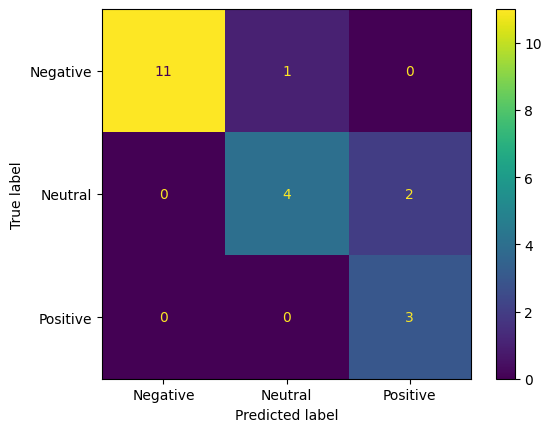

In [ ]:
_ = metrics.ConfusionMatrixDisplay.from_predictions(
    y_true = predicted_data.sentiment,
    y_pred = predicted_data.predictions
)

In [ ]:
report = metrics.classification_report(
    y_true = predicted_data.sentiment,
    y_pred = predicted_data.predictions,
)

print(report)

              precision    recall  f1-score   support

    Negative       1.00      0.92      0.96        12
     Neutral       0.80      0.67      0.73         6
    Positive       0.60      1.00      0.75         3

    accuracy                           0.86        21
   macro avg       0.80      0.86      0.81        21
weighted avg       0.89      0.86      0.86        21



## How to handle probability predictions

First generate probability predictions with the following prompt (Copy to the OpenAI Notebook):

In [ ]:
prompt = """
Estimate a probability that the customer shows disatisfaction in the tweet below, which is delimited with triple backticks.
Give your answer as a value between 0 and 1 with 2 decimal places.

Tweet: '''{tweet}'''
"""

Then print your results with `print(json.dumps(results, indent=4))` copy and store them in a json file.

Use the name of the json in the code below:

In [ ]:
# Enter your filename here
prediction_file = "predictions_p2.json" 

predictions = json.load(open(prediction_file))
predicted_data = data[['tweet', 'sentiment', 'agreement']].copy()
predicted_data['predictions'] = predicted_data.index.map(predictions).astype('float')
predicted_data = predicted_data[predicted_data.predictions.notnull()]
predicted_data['is_negative'] = (predicted_data.sentiment == 'Negative').astype('int')
predicted_data

,tweet,sentiment,agreement,predictions,is_negative
tweet_id,,,,,
0,@SouthwestAir still waiting. Just hit one hour.,Negative,100.0,0.95,1
1,@SouthwestAir although I'm not happy you Cance...,Neutral,100.0,0.15,0
2,@SouthwestAir Hello - been on hold for extreme...,Negative,100.0,0.90,1
3,@SouthwestAir I'm teaching new #travelers how ...,Neutral,100.0,0.00,0
4,@SouthwestAir Very frustrated for the loooooon...,Negative,100.0,0.90,1
5,@SouthwestAir still no update text #2053 &amp;...,Negative,100.0,0.90,1
6,@SouthwestAir your agents were the ones who we...,Negative,100.0,0.80,1
7,@SouthwestAir my wife had been in group A in p...,Negative,100.0,0.80,1
8,@SouthwestAir my flight was delayed 4 hrs. I'm...,Negative,100.0,0.95,1


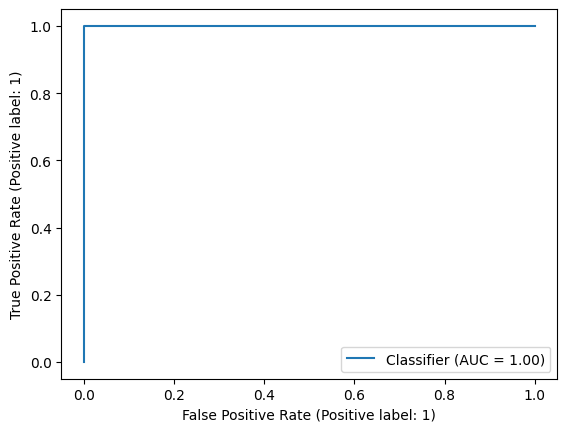

In [ ]:
_ = metrics.RocCurveDisplay.from_predictions(
    y_true = predicted_data.is_negative,
    y_pred = predicted_data.predictions

)